In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
from models import AlexNet
import os

In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
data_dir = '../data/'
classes = sorted(os.listdir(data_dir + 'normal_test/'))
batch_size = 64

In [3]:
mean = [0.44947562, 0.46524084, 0.40037745]
std = [0.18456618, 0.16353698, 0.20014246]

data_transforms = {
        'test': transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize(mean, std)])}

test_images = datasets.ImageFolder(os.path.join(data_dir, 'normal_test'),
                    data_transforms['test'])

test_dataloader = DataLoader(test_images, batch_size=batch_size, shuffle=False, num_workers=4)

In [4]:
model = AlexNet()
model.load_state_dict(torch.load('alexnet_model.model', map_location=str(device)))
model.eval()

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Dropout(p=0.5)
    (1): Linear(in_features=12544, out_features=4096, bias=True)
    (2): ReLU(inplace)
    (3): Dropout(p=0.5)
    (4): Linear(in_features=4096, out_featur

In [22]:
def imshow(filters, num_cols, title=None):
    filters = np.asarray(filters)
    filters = np.asarray(std).mean() * filters + np.asarray(mean).mean()
    filters = np.clip(filters, 0, 1)
    num_rows = 1
    fig = plt.figure(figsize=(num_cols, num_rows ))
    i = 0
    for kernel in filters:
        ax1 = fig.add_subplot(num_rows, num_cols, i+1)
        ax1.imshow(kernel, cmap='gray', interpolation='none')
        ax1.axis('off')
        ax1.set_xticklabels([])
        ax1.set_yticklabels([])
        i += 1
    if title is not None:
        plt.title(title)
    plt.pause(0.001)

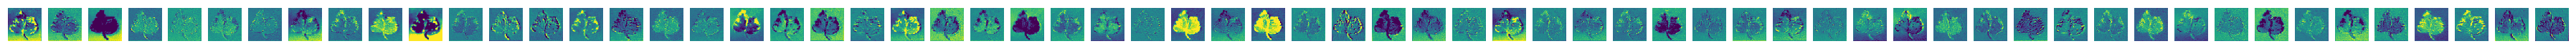

In [55]:
with torch.no_grad():
    for data in test_dataloader:
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        for layer in model.features:
            outputs = layer(inputs)
            inputs = outputs
            if isinstance(layer, nn.Conv2d):
                for i in range(len(outputs)):
                    imshow(outputs[i], outputs[i].size()[0])
                    break
                break
        break

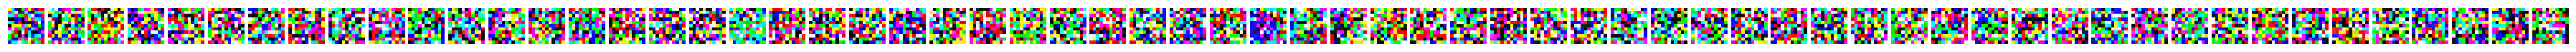

In [21]:
def plot_kernels(tensor, num_cols):
    """
    mean = 0.5
    std = 0.5
    maxVal = tensor.max()
    minVal = abs(tensor.min())
    maxVal = max(maxVal,minVal)
    tensor = tensor / maxVal
    tensor = tensor / 2
    tensor = tensor + 0.5
    """
    #tensor = tensor * np.asarray(std).mean() + np.asarray(mean).mean()
    num_rows = 1
    fig = plt.figure(figsize=(num_cols, num_rows))
    i = 0
    for t in tensor:
        ax1 = fig.add_subplot(num_rows, num_cols, i+1)
        pilTrans = transforms.ToPILImage()
        pilImg = pilTrans(t)
        ax1.imshow(pilImg, interpolation='none')
        ax1.axis('off')
        ax1.set_xticklabels([])
        ax1.set_yticklabels([])
        i += 1
    plt.subplots_adjust(wspace=0.1, hspace=0.1)
    plt.show()
    
for m in model.modules():
    if isinstance(m, nn.Conv2d):
        plot_kernels(m.weight.data, len(m.weight.data))
        break


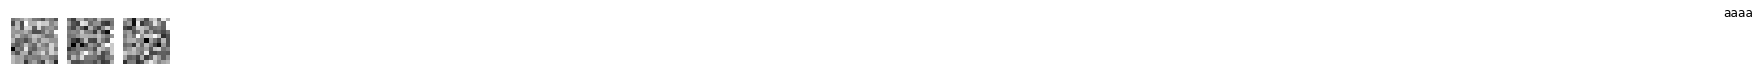

In [23]:
# plot filter by filter
for m in model.modules():
    if isinstance(m, nn.Conv2d):
        for i in range(m.weight.shape[0]):
            imshow(m.weight.data[i], m.weight.shape[0])
            break
        break